In [1]:
!python -V

Python 3.12.3


### Load Libraries

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ["PULocationID", "DOLocationID"]
    df[categorical] = df[categorical].astype(str)
    
    return df

### HW Questions

Q1. How many columns are there?
	 A1. There are 19 columns in dataset. 

Q2. What's the standard deviation of the trips duration in January?
	 A2. Its standard deviation equals  42.59 minutes. 

Q3. What fraction of the records left after you dropped the outliers?
	 A3.  98 percent of observations remain. 

Q4. What's the dimensionality of this matrix (number of columns)?
	 A4. The matrix number of columns is 515. 

Q5. What's the RMSE on train?
	 A5. The train RMSE equals  7.65. 

Q6. What's the RMSE on validation?
	 A6. The validation RMSE equals  7.81.


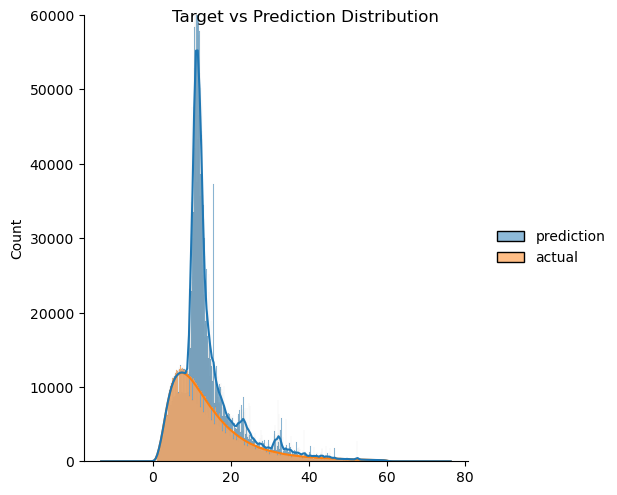

In [3]:
# Load the data
df_train = pd.read_parquet("data/yellow_tripdata_2023-01.parquet")

print("Q1. How many columns are there?")
print(f"\t A1. There are {df_train.shape[1]} columns in dataset. \n")


# compute ride's duration in minutes
df_train["duration"] = df_train.tpep_dropoff_datetime - df_train.tpep_pickup_datetime
df_train.duration = df_train.duration.dt.total_seconds() / 60

print("Q2. What's the standard deviation of the trips duration in January?")
durations_std = df_train.duration.std()
print(f"\t A2. Its standard deviation equals {durations_std: .2f} minutes. \n")

# filter the data
raw_n_rows = df_train.shape[0]
df_train = df_train[(df_train.duration >= 1) & (df_train.duration <= 60)]
filtered_n_rows = df_train.shape[0]
print("Q3. What fraction of the records left after you dropped the outliers?")
print(f"\t A3. {100 *(filtered_n_rows / raw_n_rows): .0f} percent of observations remain. \n")

# select a couple of categorical features 
categorical = ["PULocationID", "DOLocationID"]
df_train[categorical] = df_train[categorical].astype(str)

# one-hot encode them
train_dicts = df_train[categorical].to_dict(orient='records')
dv = DictVectorizer()

# get new features matrix
X_train = dv.fit_transform(train_dicts)

print(f"Q4. What's the dimensionality of this matrix (number of columns)?")
print(f"\t A4. The matrix number of columns is {X_train.shape[1]}. \n")

# train a plain linear regression for the next questions
target = 'duration'
y_train = df_train[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

train_rmse = root_mean_squared_error(y_train, y_pred)

print(f"Q5. What's the RMSE on train?")
print(f"\t A5. The train RMSE equals {train_rmse: .2f}. \n")

# prepare a validation dataset
df_val = read_dataframe("data/yellow_tripdata_2023-02.parquet")
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val[target].values

# apply the model from above
y_pred = lr.predict(X_val)
val_rmse = root_mean_squared_error(y_val, y_pred)

print(f"Q6. What's the RMSE on validation?")
print(f"\t A6. The validation RMSE equals {val_rmse: .2f}.")

# plot target vs prediction distribution
sns.displot(
    {"prediction": y_pred, 
     "actual": y_train
    }, 
    kde=True, 
    multiple="stack"
)
plt.ylim(0, 60000)
plt.suptitle('Target vs Prediction Distribution')
plt.show()